<a href="https://colab.research.google.com/github/sejin-sim/Data_Mining/blob/main/3_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing
1. Binarization
2. Mean removal

In [ ]:
# Binarizer (Binarization) : 0 or 1

from sklearn import preprocessing
import numpy as np

data = np.array([[2.2, 5.9, -1.8], 
                 [5.4, -3.2, -5.1], 
                 [-1.9, 4.2, 3.2]])

bindata = preprocessing.Binarizer(threshold=1.5).transform(data) # threshold : 임계값

print('Binarized data\n\n', bindata)
# 즉 1.5 기준으로 임계값으로 0 or 1을 구분

print('Mean (before)= ', data.mean(axis=0))              # 평균 axis 0 열, 1 행
print('Standarr Deviation (before)= ', data.std(axis=0)) # 표준편차

Binarized data

 [[1. 1. 0.]
 [1. 0. 0.]
 [0. 1. 1.]]
Mean (before)=  [ 1.9         2.3        -1.23333333]
Standarr Deviation (before)=  [2.98775278 3.95052739 3.41207008]


# 스케일링(scaling)

- 연속형 데이터의 특성 단위가 다를 경우 과대 혹은 과소한 파라미터가 지배적으로 추정에 영향을 미출 수 있기 때문에 모든 자료에 대해서 동일한 범위 내에서 변환을 하는 것이다.
- 만약 특성변수의 단위가 큰 차이를 보이면 스케일링한 데이터와 하지 않은 데이터 간의 정확도는 크게 차이를 보임
- ML/Deep ML을 수행하기 이전에 scaling을 수행하여야 한다..

   1) Min-Max scaling   
   > ML / Deep ML의 가장 일반적인 scaling  
(각 특성의 변수 값 – 최소값) / (최대값 – 최소값)
모든 값은 0 이상의 값을 가짐( >= 0)   
 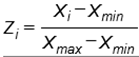

    2) Standardization
    > 각 수치와 평균의 차이를 표준편차로 나눈 값.
평균이 0, 표준편차가 1이 되는 통계적인 자료 표준화의 대표값
일반적인 범위 이상의  경우는 매우 큰 음의 값 혹은 매우 큰 양의 값이 될 수 있다.   
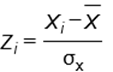


In [ ]:
# min-max - MinMaxScaler

X = np.array([ [2.2, 5.9, -1.8], 
                [5.4, -3.2, -5.1], 
                [-1.9, 4.2, 3.2]])

# 코드 구현
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# 패키지 사용
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_minmax = minmax_scaler.fit_transform(data)
print('MinMaxScaler applied on the data:\n', data_minmax)

MinMaxScaler applied on the data:
 [[0.56164384 1.         0.39759036]
 [1.         0.         0.        ]
 [0.         0.81318681 1.        ]]


In [ ]:
# standardization - scale

X = np.array([ [2.2, 5.9, -1.8], 
                [5.4, -3.2, -5.1], 
                [-1.9, 4.2, 3.2]])
 
# 코드 구현
Y=X-X.mean(axis=0)
z=Y/X.std(axis=0)

# 패키지 사용
scaled_data = preprocessing.scale(data)
print(scaled_data)

print('Mean (after)= ', scaled_data.mean(axis=0))
print('Standard Deviation (after)= ', scaled_data.std(axis=0))

[[ 0.10040991  0.91127074 -0.16607709]
 [ 1.171449   -1.39221918 -1.1332319 ]
 [-1.27185891  0.48094844  1.29930899]]
Mean (after)=  [0.00000000e+00 0.00000000e+00 7.40148683e-17]
Standard Deviation (after)=  [1. 1. 1.]


# Normalization : 정규화

1) Least absolute deviations (LAD):  최소 절대 오차   
> 1) 각 특징 벡터의 값을 공통 척도로 가져옵니다.   
> 2) L1 : 최소 절대 오차  
  3) 절대 값의 합 (각 행) = 1을 확인합니다.    
  4)이상치에 민감합니다.   
  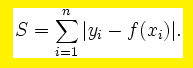

2) Least squares mothod (LSM) : 최소제곱법   
>1) 각 특징 벡터의 값을 공통 척도로 가져옵니다.   
2) L2 : 최소제곱법    
3) 제곱합 (각 행) = 1인지 확인합니다.   
4) 훈련 중 이상 치를 고려   
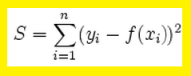

In [ ]:
# Least absolute deviations (LAD)
from sklearn import preprocessing
import numpy as np
import pandas as pd 

data = np.array([[ 1., -1.,  2.],
                [ 2.,  0.,  0.],
                [ 0.,  1., -1.]])

# 코드 구현
abs1=np.abs(data)              # abs 절대값 
# [[1. 1. 2.]
#  [2. 0. 0.]
#  [0. 1. 1.]]

abssum=np.sum(abs1, axis=1)    
# [4. 2. 2.]

sm = np.divide(data.T, abssum) # 행렬끼리 나눗셈
# [ 0.25  1.    0.  ]
#  [-0.25  0.    0.5 ]
#  [ 0.5   0.   -0.5 ]]
print(sm.T,"\n")


# 패키지 사용
data_l1 = preprocessing.normalize(data, norm='l1')
print('L1-normalized data:\n', data_l1)

[[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]] 

L1-normalized data:
 [[ 0.25 -0.25  0.5 ]
 [ 1.    0.    0.  ]
 [ 0.    0.5  -0.5 ]]


In [ ]:
# Least squares mothod (LSM) 

X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

# 코드 구현
sq1=X**2                   # 제곱
abssum=np.sum(sq1, axis=1) # SUM
a= np.sqrt(abssum)         # 제곱근 
print("sqrt=",a)
sm = np.divide(X.T, a)     # 행렬끼리 나눗셈
print(sm.T)

# 패키지 사용
data_l2 = preprocessing.normalize(data, norm='l2')
print('\nL2-normalized data:\n', data_l2)


sqrt= [2.44948974 2.         1.41421356]
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]

L2-normalized data:
 [[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


# One-hot-encoding

- 알고리즘의 구조에 따라 범주형 특성이 무시, 실제와 오차 발생할 수 있다
- 범주형 데이터가 숫자이면 연속형 데이터로 인식 될 수 있음. 
- 이에 대해 각 변수의 하위범주로 0, 1 부울 형태로 구분하여 하위변수를 생성하여 처리
- 통계학에서는 dummy variable


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DM/homeprices.csv')
df


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies = pd.get_dummies(df.town) # 결측값을 제외하고 0과 1로 구성된 더미값이 만들어진다. 
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged =pd.concat([df,dummies], axis='columns') # contact는 합병
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [ ]:
final = merged.drop(['town', 'west windsor'], axis='columns') # 컬럼들을 삭제
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
X=final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [ ]:
y = final.price
y


0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model.fit(X, y)

model.predict([[2800, 0, 1]])
model.score(X,y)


0.9573929037221873

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = df
le.fit_transform(dfle.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [ ]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X= df[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
y= dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
gun = OneHotEncoder()
gun.fit_transform(X).toarray()

X=gun.fit_transform(X).toarray()
X

X=X[:, 1:]
X


# from sklearn.compose import ColumnTransformer 
# gun = ColumnTransformer([(OneHotEncoder(),[0])])
# gun.fit_transform(X)

array([[1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1.,

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DM/carprice.csv', index_col=0)
df.rename(columns={"Car Model":"Car_Model"}, inplace=True)
df

,Car_Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Car_Model'] = le.fit_transform(df['Car_Model'])
df

,Car_Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
X = df.drop(columns=['Sell Price($)'])
y = df['Sell Price($)']

In [ ]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression()
model.fit(X, y)
print(model.predict([[2, 45000, 4]]))
print(model.predict([[1, 86000, 7]]))
print(model.score(X, y))

[33336.7721827]
[16106.74127344]
0.8719970367825953
